## <b> Import modules

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from openpyxl import load_workbook
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors

In [352]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## <b> Import and process

In [353]:
d = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/raw_files/complete.csv')
d = d.set_index('Strain')
print(d.shape)
d.head()

(950, 314)


,158P_110H,15P_1H_9P,257P_141H,1H_237P,153H_241P,10H_42P,174P_5H_5P,86P_63H,132P_89H,244P_168H,...,42H_54P,69P_52H_85P,91H_127P,69P_52H_155P,16P_18H,104P_34H_189P,104P_9H,46P_40H,57P_45H_95P,1H_105P
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST006480109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST000380050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [354]:
#Save original datafram to excel file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files//completeT-A-pair_revised.xlsx"
d.to_excel(path, sheet_name='original_cluster')

In [355]:
#presence absence table
d= d.apply(lambda x: [y if y <= 1 else 1 for y in x])

In [356]:
print(d.shape)
d.head()

(950, 314)


,158P_110H,15P_1H_9P,257P_141H,1H_237P,153H_241P,10H_42P,174P_5H_5P,86P_63H,132P_89H,244P_168H,...,42H_54P,69P_52H_85P,91H_127P,69P_52H_155P,16P_18H,104P_34H_189P,104P_9H,46P_40H,57P_45H_95P,1H_105P
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST006480109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST000380050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [357]:
#save presence absence table (unitary matrix) to excel file

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files//completeT-A-pair_revised.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
d.to_excel(writer, sheet_name = 'T-A-pair_presence_absence')
writer.save()
writer.close()

In [358]:
#Add ST column
com_d = d.copy()
com_d['ST'] = com_d.index.str[2:-4].astype(int)
first_column = com_d.pop('ST')
com_d.insert(0, 'ST', first_column)
com_d.head(3)

,ST,158P_110H,15P_1H_9P,257P_141H,1H_237P,153H_241P,10H_42P,174P_5H_5P,86P_63H,132P_89H,...,42H_54P,69P_52H_85P,91H_127P,69P_52H_155P,16P_18H,104P_34H_189P,104P_9H,46P_40H,57P_45H_95P,1H_105P
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST006480109,648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,73,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [359]:
com_d.head()

,ST,158P_110H,15P_1H_9P,257P_141H,1H_237P,153H_241P,10H_42P,174P_5H_5P,86P_63H,132P_89H,...,42H_54P,69P_52H_85P,91H_127P,69P_52H_155P,16P_18H,104P_34H_189P,104P_9H,46P_40H,57P_45H_95P,1H_105P
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST006480109,648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,73,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST000380050,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


## <b> Boxplot, histogram and ecdf

In [360]:
#total no of toxins 
a  = com_d.reset_index()
a = a.set_index(['ST', 'Strain'])
#a = a.drop('Strain', axis = 1).set_index('ST')
a_sum = a.sum(axis = 1).to_frame()
a_sum.rename(columns = {0:'Total no of T-A systems'}, inplace = True)
a_sum.reset_index(inplace=True, level=['ST'])
a_sum['ST'] = 'ST' + a_sum['ST'].astype(str)
a_sum.head()

,ST,Total no of T-A systems
Strain,,
ST001670050,ST167,25
ST006480109,ST648,24
ST000730234,ST73,21
ST000580141,ST58,20
ST000380050,ST38,39


In [361]:
#descriptive statistics
d_stat=  a_sum.groupby(['ST']).describe()
d_stat

Total no of T-A systems                                                 
                        count   mean       std   min    25%   50%    75%   max
ST                                                                            
ST10                     50.0  21.92  2.406115  15.0  22.00  22.0  23.75  27.0
ST101                    50.0  23.46  3.818377  17.0  20.25  22.0  26.00  31.0
ST11                     50.0  29.40  1.784285  25.0  28.00  29.0  31.00  34.0
ST117                    50.0  25.42  2.611513  22.0  23.00  25.0  27.00  32.0
ST12                     50.0  17.44  3.357356   0.0  16.25  18.0  19.00  25.0
ST127                    50.0  19.22  2.112064  16.0  18.00  19.0  20.00  26.0
ST131                    50.0  24.02  1.867990  19.0  23.00  25.0  25.75  27.0
ST155                    50.0  22.00  2.398979  16.0  21.00  21.5  23.75  26.0
ST156                    50.0  24.28  3.136617  19.0  22.00  24.0  26.00  33.0
ST167                    50.0  24.20  2.913725  18.0  22.00  24.0  26.00  30.0
ST38                     50.0  27.58  3.258208  22.0  25.25  27.0  29.00  39.0
ST405                    50.0  30.20  2.231500  25.0  29.00  31.0  32.00  34.0
ST410                    50.0  19.58  2.295426  14.0  18.25  20.0  21.00  25.0
ST48                     50.0  20.52  2.375384  16.0  19.00  20.0  23.00  25.0
ST58                     50.0  22.00  2.821203  18.0  20.00  22.0  24.00  29.0
ST648                    50.0  27.12  3.088094  22.0  24.00  27.0  29.00  36.0
ST69                     50.0  27.04  2.355714  21.0  26.00  27.0  28.00  32.0
ST73                     50.0  20.52  2.636014  16.0  19.00  20.0  21.75  30.0
ST95                     50.0  23.12  2.631365  18.0  21.25  22.0  24.00  30.0

In [362]:
#save total no of toxins per st and descriptive stat to excel to excel

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files//completeT-A-pair_revised.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
a_sum.to_excel(writer, sheet_name = 'TAsystems_per_strain')
d_stat.to_excel(writer, sheet_name = 'descriptive_statistics')
writer.save()
writer.close()

## <b> Heatmap

In [363]:
com_d.shape

(950, 315)

In [364]:
#group by ST
genes =com_d.groupby(by=['ST'])

In [365]:
genes.head()

,ST,158P_110H,15P_1H_9P,257P_141H,1H_237P,153H_241P,10H_42P,174P_5H_5P,86P_63H,132P_89H,...,42H_54P,69P_52H_85P,91H_127P,69P_52H_155P,16P_18H,104P_34H_189P,104P_9H,46P_40H,57P_45H_95P,1H_105P
Strain,,,,,,,,,,,,,,,,,,,,,
ST001670050,167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST006480109,648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,73,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST000380050,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST001010119,101,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
ST000110431,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ST001270049,127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [366]:
# Write data from groups into individual dataframes
df_list=[]
for i in genes.groups:
    tag='ST'+str(i)+'_df'
    #print(tag)
    df_list.append(tag)
    globals()[tag] =pd.DataFrame(genes.get_group(i))
    print("Shape of {}:\t{}".format(tag,globals()[tag].shape))

Shape of ST10_df:	(50, 315)
Shape of ST11_df:	(50, 315)
Shape of ST12_df:	(50, 315)
Shape of ST38_df:	(50, 315)
Shape of ST48_df:	(50, 315)
Shape of ST58_df:	(50, 315)
Shape of ST69_df:	(50, 315)
Shape of ST73_df:	(50, 315)
Shape of ST95_df:	(50, 315)
Shape of ST101_df:	(50, 315)
Shape of ST117_df:	(50, 315)
Shape of ST127_df:	(50, 315)
Shape of ST131_df:	(50, 315)
Shape of ST155_df:	(50, 315)
Shape of ST156_df:	(50, 315)
Shape of ST167_df:	(50, 315)
Shape of ST405_df:	(50, 315)
Shape of ST410_df:	(50, 315)
Shape of ST648_df:	(50, 315)


In [367]:
df_list

['ST10_df',
 'ST11_df',
 'ST12_df',
 'ST38_df',
 'ST48_df',
 'ST58_df',
 'ST69_df',
 'ST73_df',
 'ST95_df',
 'ST101_df',
 'ST117_df',
 'ST127_df',
 'ST131_df',
 'ST155_df',
 'ST156_df',
 'ST167_df',
 'ST405_df',
 'ST410_df',
 'ST648_df']

In [368]:
ST648_df.head(2)

,ST,158P_110H,15P_1H_9P,257P_141H,1H_237P,153H_241P,10H_42P,174P_5H_5P,86P_63H,132P_89H,...,42H_54P,69P_52H_85P,91H_127P,69P_52H_155P,16P_18H,104P_34H_189P,104P_9H,46P_40H,57P_45H_95P,1H_105P
Strain,,,,,,,,,,,,,,,,,,,,,
ST006480109,648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST006480088,648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [369]:
#ST10_df.to_csv('ST10.csv')

In [370]:
def t_percentage(df,tag):

    df_h=df.copy()
    #df_h.head()
    x=list(df_h.columns)
    #print(x)
    size=df_h.shape[0]
    #print(size)
    df_com=pd.DataFrame(columns=['T-A pair',tag])
    #print(df_com.head())
    for i in x:
        #print(df_h[i])
        s=df_h[i].astype(int).sum()
        #print(s)
        p=(s/size)*100
        
        df_com = df_com.append({'T-A pair': i,tag:p}, ignore_index=True)



    return(df_com)

In [371]:
#Calculate percentage of gene presence in each ST
com_list=[]
for i in df_list:
    d=globals()[i].copy()
    d.drop('ST', axis=1,inplace=True)
    x=i.replace('df','complete')
    y=i.replace('_df','')
    com_list.append(x)
    globals()[x]=t_percentage(d,y)
    print(x,globals()[x].shape)

ST10_complete (314, 2)
ST11_complete (314, 2)
ST12_complete (314, 2)
ST38_complete (314, 2)
ST48_complete (314, 2)
ST58_complete (314, 2)
ST69_complete (314, 2)
ST73_complete (314, 2)
ST95_complete (314, 2)
ST101_complete (314, 2)
ST117_complete (314, 2)
ST127_complete (314, 2)
ST131_complete (314, 2)
ST155_complete (314, 2)
ST156_complete (314, 2)
ST167_complete (314, 2)
ST405_complete (314, 2)
ST410_complete (314, 2)
ST648_complete (314, 2)


In [372]:
ST10_complete

,T-A pair,ST10
0,158P_110H,0.0
1,15P_1H_9P,0.0
2,257P_141H,2.0
3,1H_237P,0.0
4,153H_241P,2.0
...,...,...
309,104P_34H_189P,0.0
310,104P_9H,2.0
311,46P_40H,4.0
312,57P_45H_95P,0.0


In [373]:
def merge_dataframe(list):
    l=list.copy()
    x=l.pop(0)
    x_df=globals()[x]
    for i in l:
        x_df=pd.merge(x_df,globals()[i],how='outer',on='T-A pair').fillna(0)
    return(x_df)

In [374]:
# Merge the dataframes
com_df=merge_dataframe(com_list)
com_df

,T-A pair,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
0,158P_110H,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15P_1H_9P,0.0,0.0,16.0,4.0,4.0,4.0,0.0,22.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,2.0,0.0
2,257P_141H,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1H_237P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,153H_241P,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,104P_34H_189P,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,104P_9H,2.0,0.0,0.0,4.0,0.0,0.0,2.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
311,46P_40H,4.0,4.0,12.0,30.0,20.0,14.0,10.0,0.0,40.0,22.0,20.0,8.0,10.0,16.0,32.0,16.0,26.0,4.0,6.0
312,57P_45H_95P,0.0,0.0,0.0,0.0,32.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0


In [375]:
##Encoding
#partner and hit keys
df_p_keys = pd.read_csv('partner_pfam_annot_sorted.csv')

# Use re to add 'UNKW' to entries where 'P-' is not followed by anything
#df_p_keys['short_name'] = df_p_keys['short_name'].str.replace(r'P-(?![\w\d])', 'P-UNKW')
df_p_keys['short_name'] = df_p_keys['short_name'].apply(lambda x: x + 'UNKW' if x.endswith('-') else x)
df_h_keys = pd.read_csv('hits_pfam_annot_sorted.csv')
hit_column_order = ['Hit Id', 'short_name']  # Define the new order of columns
df_h_keys = df_h_keys[hit_column_order]

In [376]:
#p_key_mapping

In [377]:
#partner_modification
df_p_keys['short_name'] = df_p_keys['short_name'] +'('+ df_p_keys['Partner Id'] +')'
df_p_keys[['k', 'antitoxins']] = df_p_keys['short_name'].str.split('-',n=1,expand=True)
df_p_keys.drop(['short_name', 'k'], axis = 1, inplace = True)

In [378]:
#HIt_modification
df_h_keys['short_name'] = df_h_keys['short_name'] +'('+ df_h_keys['Hit Id'] +')'
df_h_keys[['k', 'toxins']] = df_h_keys['short_name'].str.split('-',n=1,expand=True)
df_h_keys.drop(['short_name', 'k'], axis = 1, inplace = True)

In [379]:
print(df_p_keys.head(3))
print('-----------------------------------')
print(df_h_keys.head(3))

  Partner Id   antitoxins
0         1P  Ub-RnfH(1P)
1         2P     Sdh5(2P)
2         3P     UNKW(3P)
-----------------------------------
  Hit Id               toxins
0     1H       CbtA_toxin(1H)
1     2H       Cpta_toxin(2H)
2     3H  Polyketide_cyc2(3H)


In [380]:
p_key_mapping = dict(zip(df_p_keys['Partner Id'], df_p_keys['antitoxins']))
h_key_mapping = dict(zip(df_h_keys['Hit Id'], df_h_keys['toxins']))

In [381]:
#p_key_mapping

In [382]:
df_p_keys['antitoxins'].str.count('UNKW').sum()

147

In [383]:
com_df1 =com_df.copy()

In [384]:
#Encode T-A pair
def encode_ta_pair(row):
    parts = row['T-A pair'].strip().split('_')
    encoded_parts = []
    encoded_partP = None
    encoded_partH = None

    for part in parts:
        if part.endswith('P'):
            if encoded_partH:
                # If 'H' exists, add it between 'P' parts
                if encoded_partP:
                    encoded_partP += f" | {encoded_partH} | {p_key_mapping.get(part, part)}"
                else:
                    encoded_partP = f"{encoded_partH} | {p_key_mapping.get(part, part)}"
                encoded_partH = None
            else:
                if encoded_partP:
                    encoded_partP += f" | {p_key_mapping.get(part, part)}"
                else:
                    encoded_partP = p_key_mapping.get(part, part)
        elif part.endswith('H'):
            if encoded_partH:
                encoded_partH += f" | {h_key_mapping.get(part, part)}"
            else:
                encoded_partH = h_key_mapping.get(part, part)

    if encoded_partP:
        encoded_parts.append(encoded_partP)
    if encoded_partH:
        encoded_parts.append(encoded_partH)

    return ' | '.join(encoded_parts)


com_df['T-A pair'] = com_df.apply(encode_ta_pair, axis=1)


In [385]:
com_df.head()

,T-A pair,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
0,UNKW(158P) | HicA_toxin(110H),0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CbeA_antitoxin(15P) | CbtA_toxin(1H) | DUF5983...,0.0,0.0,16.0,4.0,4.0,4.0,0.0,22.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,2.0,0.0
2,PolyA_pol(257P) | HD(141H),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CbtA_toxin(1H) | DUF5983(237P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ANT(153H) | UNKW(241P),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [386]:
com_df.shape

(314, 20)

In [387]:
#at_df.to_csv('antitoxin_percentages.csv')

In [388]:
#Ssave toxin percentages to excel file

#path of preexisting file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files//completeT-A-pair_revised.xlsx"
# Generating workbook
book = load_workbook(path)
# Generating the writer engine
writer = pd.ExcelWriter(path, engine = 'openpyxl')
# Assigning the workbook to the writer engine
writer.book = book
# Adding the DataFrames to the excel as a new sheet
com_df.to_excel(writer, sheet_name = '%presence')
writer.save()
writer.close()

In [389]:
com_df.shape

(314, 20)

In [390]:
complete_df=com_df.copy()
complete_df.set_index('T-A pair',inplace=True)
complete_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
T-A pair,,,,,,,,,,,,,,,,,,,
UNKW(158P) | HicA_toxin(110H),0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbeA_antitoxin(15P) | CbtA_toxin(1H) | DUF5983(9P),0.0,0.0,16.0,4.0,4.0,4.0,0.0,22.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,2.0,0.0
PolyA_pol(257P) | HD(141H),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbtA_toxin(1H) | DUF5983(237P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANT(153H) | UNKW(241P),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [391]:
#complete_df.to_csv('complete_percentages.csv')

In [392]:
complete_df.shape

(314, 19)

In [393]:
complete_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
T-A pair,,,,,,,,,,,,,,,,,,,
UNKW(158P) | HicA_toxin(110H),0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbeA_antitoxin(15P) | CbtA_toxin(1H) | DUF5983(9P),0.0,0.0,16.0,4.0,4.0,4.0,0.0,22.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,2.0,0.0
PolyA_pol(257P) | HD(141H),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbtA_toxin(1H) | DUF5983(237P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANT(153H) | UNKW(241P),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [394]:
def select_rows(df):
    d1=df.copy()
    d2=pd.DataFrame()
    for index, row in d1.iterrows():
        score =0 
        #print(index)
        for i in d1.columns:
            
            if(row[i]>=20):
                #print(index, row[i] )
                score=score+1

        #print(index, score)
        
        if(score >0):
            d2=d2.append(d1.loc[index])
    return(d2)

In [395]:
new_df = select_rows(complete_df)

In [396]:
new_df.shape

(101, 19)

In [397]:
new_df.head()

,ST10,ST101,ST11,ST117,ST12,ST127,ST131,ST155,ST156,ST167,ST38,ST405,ST410,ST48,ST58,ST648,ST69,ST73,ST95
CbeA_antitoxin(15P) | CbtA_toxin(1H) | DUF5983(9P),0.0,0.0,0.0,2.0,16.0,0.0,0.0,0.0,6.0,4.0,4.0,0.0,2.0,4.0,4.0,0.0,0.0,22.0,0.0
HTH_3(86P) | HipA_C(63H),0.0,4.0,0.0,2.0,0.0,0.0,6.0,8.0,12.0,6.0,0.0,0.0,2.0,8.0,2.0,28.0,2.0,0.0,8.0
P22_Cro(38P) | YdaT_toxin(9H),4.0,26.0,84.0,8.0,0.0,10.0,4.0,10.0,6.0,96.0,26.0,2.0,0.0,4.0,6.0,4.0,8.0,34.0,92.0
PhdYeFM_antitox(12P) | YoeB_toxin(12H),92.0,96.0,0.0,42.0,98.0,100.0,100.0,88.0,80.0,98.0,46.0,100.0,62.0,70.0,90.0,26.0,24.0,100.0,100.0
DUF955(66H) | UNKW(88P),2.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,20.0,0.0,0.0,8.0,0.0,0.0,2.0,0.0,0.0,4.0,30.0


In [398]:
#fig, ax = plt.subplots(figsize=(10,10)) 
#sns.heatmap(new_df)

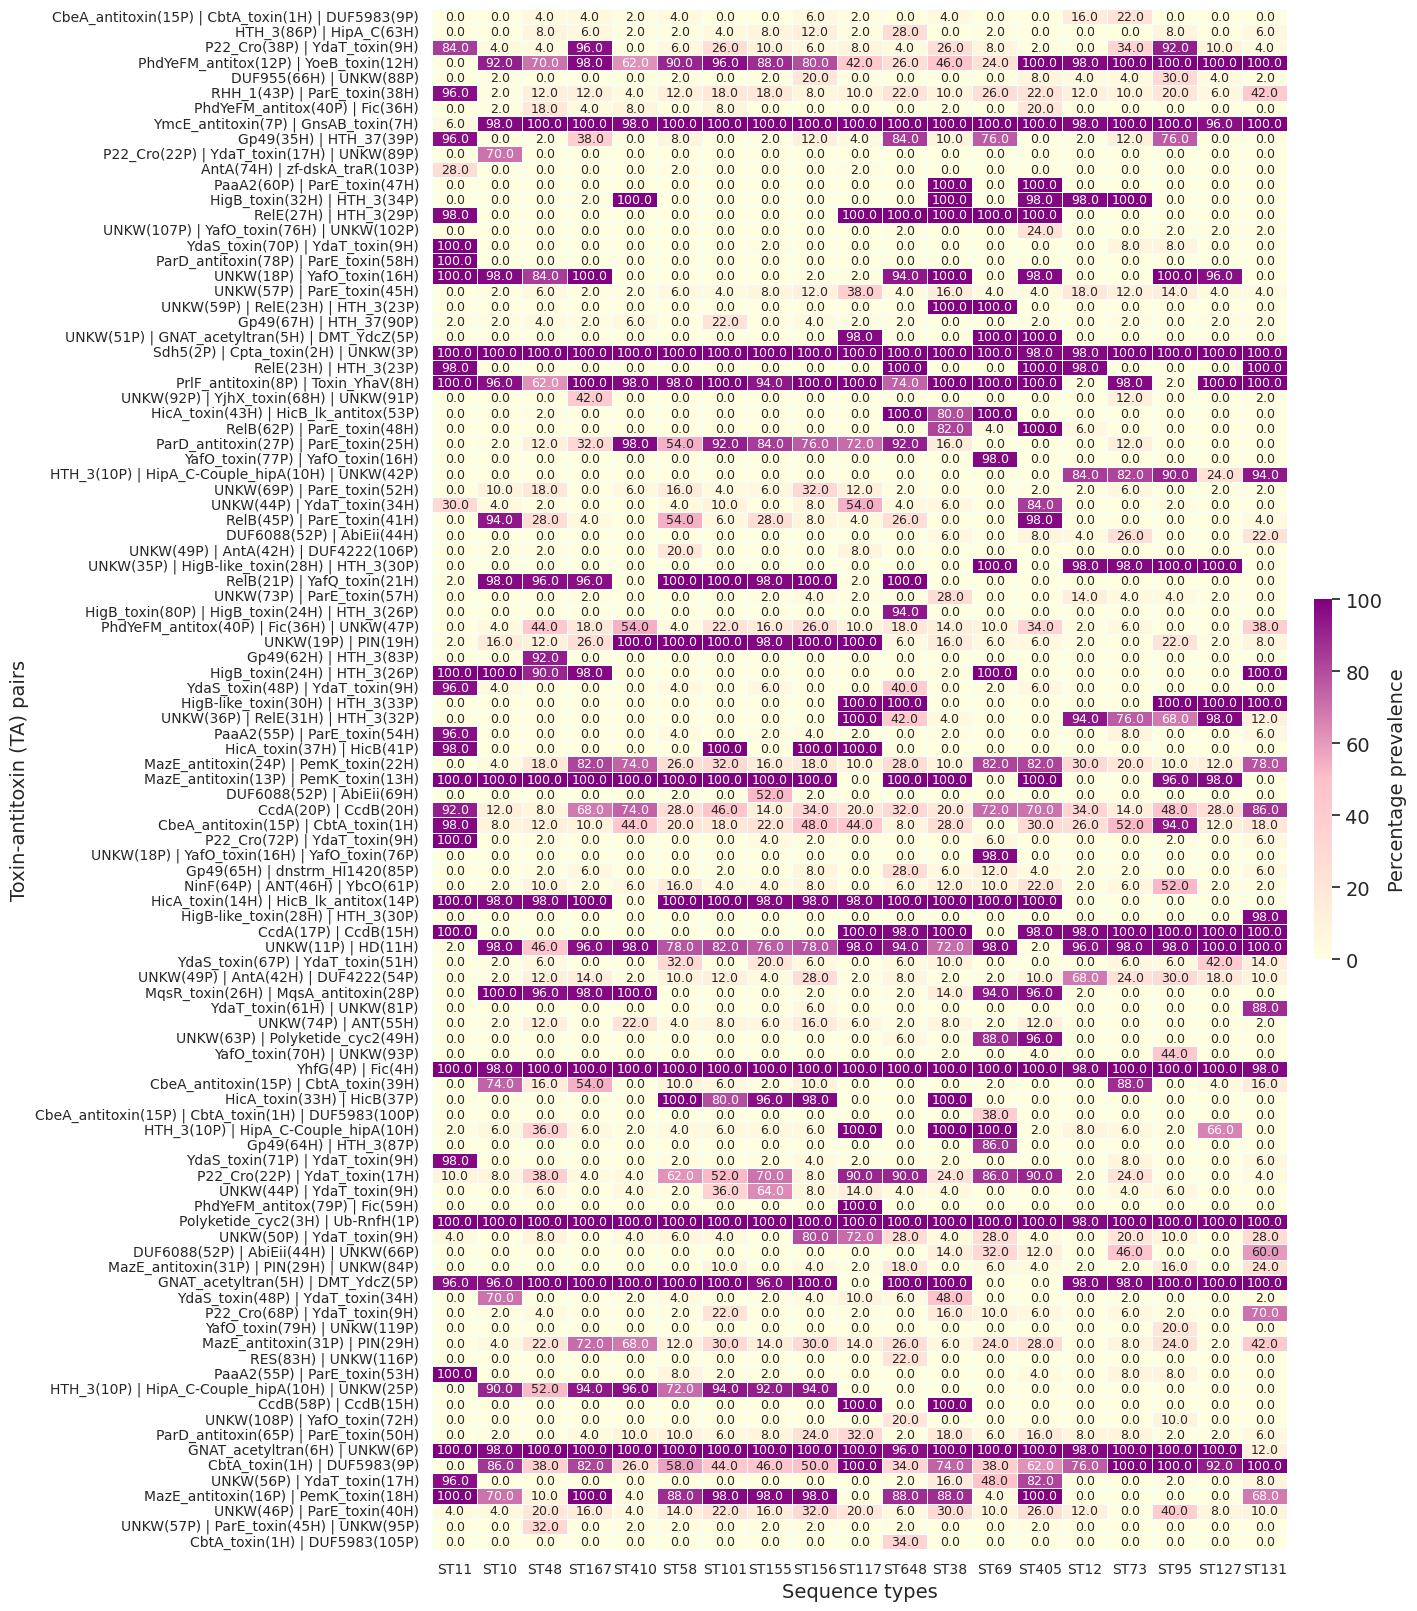

In [399]:
# define ST order
ST_new_order = ['ST11', 'ST10', 'ST48', 'ST167', 'ST410', 'ST58', 'ST101',
                'ST155', 'ST156', 'ST117', 'ST648', 'ST38', 'ST69',
                'ST405', 'ST12', 'ST73', 'ST95', 'ST127', 'ST131']

# set font scale
sns.set(font_scale=0.8)

#set figure size 
plt.figure(figsize=(15, 20))

#ordered dataframe
new_df_order = new_df.reindex(columns=ST_new_order)

#set cmap
# Adjust color points to create a smoother transition
#colors = ['whitesmoke', 'grey', 'black']  # White to Light Red to Dark Red
colors = ['lightyellow', 'pink', 'purple']
cmap = mcolors.LinearSegmentedColormap.from_list('white_to_black', colors)

# create heat map
sns.heatmap(new_df_order, xticklabels = ST_new_order,
            cmap = cmap, annot=True,
            fmt='.1f',annot_kws={"size": 9},
             cbar_kws={'orientation': 'vertical', 'fraction': 0.02, 'pad': 0.03, 'label': 'Percentage prevalence'},
            square=False, linewidths=0.5, linecolor='azure')

# Set colorbar font size
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=14)
cbar.yaxis.label.set_size(14)

#increase fontsize of x and y ticks
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Add x-label and y-label
plt.xlabel("Sequence types", fontsize = 14)
plt.ylabel("Toxin-antitoxin (TA) pairs", fontsize = 14)
plt.subplots_adjust(left=0.3) 

# save and show the figure
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/pair-heatmap.tiff',
            #dpi=300)

plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/Revised_Images/Sfig3_revised.tiff', dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/allimages/SFig3.jpg', dpi=300)
plt.show()

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

def create_heatmap(dataframe, index_pattern, xticklabels, cmap_colors, cbar_label):
    filtered_df = dataframe[dataframe.index.str.contains(index_pattern)]
    
    plt.figure(figsize=(8, 8))
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', cmap_colors)
    
    sns.heatmap(filtered_df, xticklabels=xticklabels, cmap=cmap, annot=True, vmin=0, vmax=100,
                fmt='.1f', annot_kws={"size": 6},
                cbar_kws={'orientation': 'vertical', 'fraction': 0.02, 'pad': 0.03, 'label': 'Percentage prevalence'},
                square=True, linewidths=0.5, linecolor='azure')
ST_new_order = ['ST11', 'ST10', 'ST48', 'ST167', 'ST410', 'ST58', 'ST101',
                'ST155', 'ST156', 'ST117', 'ST648', 'ST38', 'ST69',
                'ST405', 'ST12', 'ST73', 'ST95', 'ST127', 'ST131']
colors = ['whitesmoke', 'grey', 'black']

In [401]:
complete_df

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
T-A pair,,,,,,,,,,,,,,,,,,,
UNKW(158P) | HicA_toxin(110H),0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbeA_antitoxin(15P) | CbtA_toxin(1H) | DUF5983(9P),0.0,0.0,16.0,4.0,4.0,4.0,0.0,22.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,2.0,0.0
PolyA_pol(257P) | HD(141H),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbtA_toxin(1H) | DUF5983(237P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANT(153H) | UNKW(241P),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YdaS_toxin(104P) | YdaT_toxin(34H) | UNKW(189P),0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YdaS_toxin(104P) | YdaT_toxin(9H),2.0,0.0,0.0,4.0,0.0,0.0,2.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
UNKW(46P) | ParE_toxin(40H),4.0,4.0,12.0,30.0,20.0,14.0,10.0,0.0,40.0,22.0,20.0,8.0,10.0,16.0,32.0,16.0,26.0,4.0,6.0


In [402]:
filtered_df = complete_df[complete_df.index.str.contains(r'\(1H\)')]

In [403]:
filtered_df 

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
T-A pair,,,,,,,,,,,,,,,,,,,
CbeA_antitoxin(15P) | CbtA_toxin(1H) | DUF5983(9P),0.0,0.0,16.0,4.0,4.0,4.0,0.0,22.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,2.0,0.0
CbtA_toxin(1H) | DUF5983(237P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbtA_toxin(1H) | CbtA_toxin(176P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
UNKW(213P) | CbtA_toxin(1H) | DUF5983(9P),0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbtA_toxin(290P) | CbtA_toxin(1H),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
CbtA_toxin(1H) | DUF5983(279P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
UNKW(128P) | CbtA_toxin(1H) | CbtA_toxin(204P),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbtA_toxin(1H) | DUF5983(186P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbeA_antitoxin(15P) | CbtA_toxin(1H),8.0,98.0,26.0,28.0,12.0,20.0,0.0,52.0,94.0,18.0,44.0,12.0,18.0,22.0,48.0,10.0,30.0,44.0,8.0


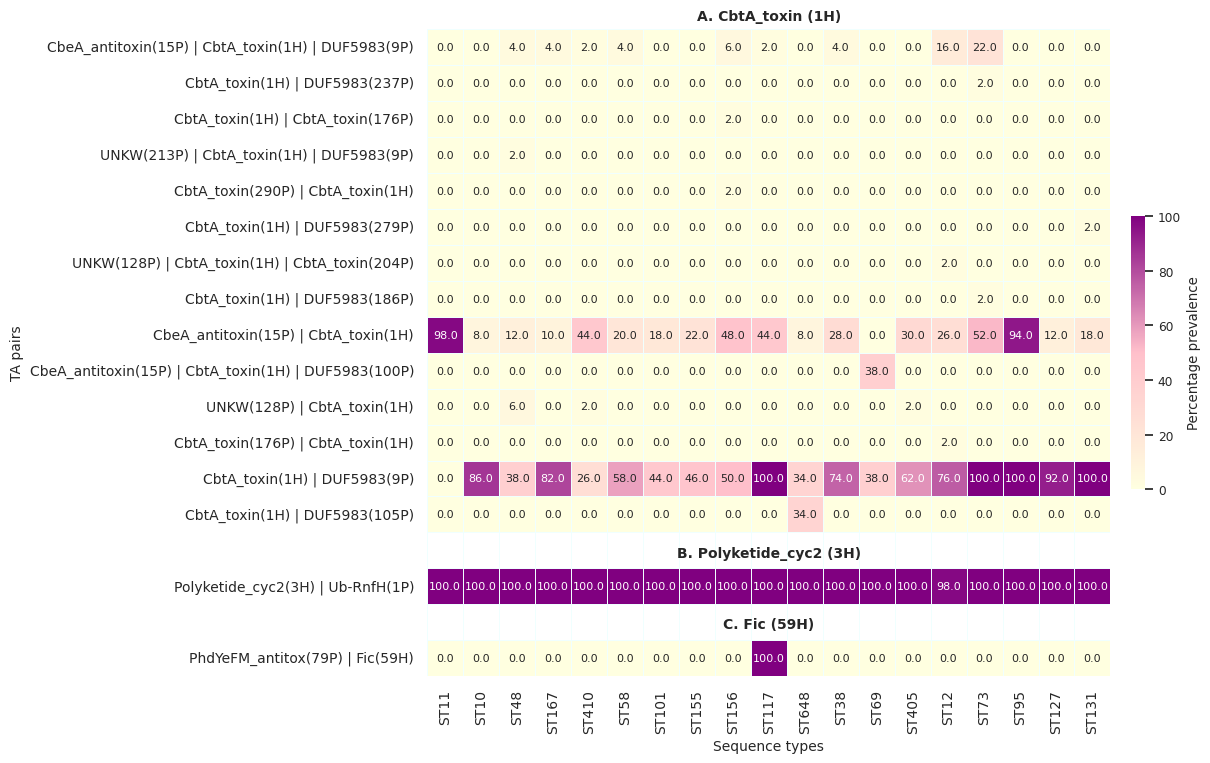

In [426]:

# Define the map data
#map0 = complete_df[complete_df.index.str.contains(r'CbtA_toxin(1H)']
map0 =complete_df[complete_df.index.str.contains(r'\(1H\)')]
map1 = complete_df[complete_df.index.str.contains(r'\(3H\)')]#complete_df[complete_df.index.str.contains(r'3H-Polyketide_cyc2')]
map2 = complete_df[complete_df.index.str.contains(r'\(59H\)')]#complete_df[complete_df.index.str.contains(r'59H-Fic')]


fig = plt.figure(figsize=(12, 10), layout="constrained")
sns.set_style("white")

ST_new_order = ['ST11', 'ST10', 'ST48', 'ST167', 'ST410', 'ST58', 'ST101',
                'ST155', 'ST156', 'ST117', 'ST648', 'ST38', 'ST69',
                'ST405', 'ST12', 'ST73', 'ST95', 'ST127', 'ST131']

colors = ['lightyellow', 'pink', 'purple']

cmap = mcolors.LinearSegmentedColormap.from_list('yellow_to_purple', colors)

# Concatenate the data vertically with empty rows in between
empty_row = pd.DataFrame(np.nan, index=[0], columns=ST_new_order)
concat_data_with_empty_rows = pd.concat([map0, empty_row, map1, empty_row, map2], axis=0)

ORDERED_DF = concat_data_with_empty_rows.reindex(columns=ST_new_order)

# Plot the heatmap
heatmap = sns.heatmap(data=ORDERED_DF, xticklabels=ST_new_order, cmap=cmap, annot=True, vmin=0, vmax=100,
                      fmt='.1f', annot_kws={"size": 8},
                      cbar_kws={'orientation': 'vertical', 'fraction': 0.02, 'pad': 0.03, 'label': 'Percentage prevalence'},
                      square=True, linewidths=0.5, linecolor='azure')

# Remove y-labels for empty rows
empty_row_indices = np.where(np.isnan(concat_data_with_empty_rows.values))[0]
yticklabels = heatmap.get_yticklabels()
for row_idx in empty_row_indices:
    yticklabels[row_idx].set_visible(False)

    
# Set labels for different maps
heatmap.text(0.5, 1.02, 'A. CbtA_toxin (1H)', ha='center', va='center', transform=heatmap.transAxes, fontweight='bold', fontsize=10)
heatmap.text(0.5, 0.19, 'B. Polyketide_cyc2 (3H)', ha='center', va='center', transform=heatmap.transAxes, fontweight='bold', fontsize=10)
heatmap.text(0.5, 0.08, 'C. Fic (59H)', ha='center', va='center', transform=heatmap.transAxes, fontweight='bold', fontsize=10)


#plt.title('Heatmap', fontsize=10, fontweight="bold")
plt.xlabel('Sequence types', fontsize=10)
plt.ylabel('TA pairs', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/Revised_Images/Fig6_revised.tiff', dpi = 300)
plt.show()


In [427]:
complete_df.shape

(314, 19)

In [428]:
complete_df.head()

,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,ST95,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
T-A pair,,,,,,,,,,,,,,,,,,,
UNKW(158P) | HicA_toxin(110H),0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbeA_antitoxin(15P) | CbtA_toxin(1H) | DUF5983(9P),0.0,0.0,16.0,4.0,4.0,4.0,0.0,22.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,2.0,0.0
PolyA_pol(257P) | HD(141H),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CbtA_toxin(1H) | DUF5983(237P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANT(153H) | UNKW(241P),2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [429]:
temp = com_df1.reset_index()

In [430]:
temp.head()

,index,T-A pair,ST10,ST11,ST12,ST38,ST48,ST58,ST69,ST73,...,ST101,ST117,ST127,ST131,ST155,ST156,ST167,ST405,ST410,ST648
0,0,158P_110H,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,15P_1H_9P,0.0,0.0,16.0,4.0,4.0,4.0,0.0,22.0,...,0.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,2.0,0.0
2,2,257P_141H,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1H_237P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,153H_241P,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [431]:
temp = temp.drop(['index'], axis = 1)

In [432]:
temp = temp['T-A pair']

In [433]:
temp1  = temp.str.split('_', expand = True)

In [434]:
# Separate H values in one column and P values in another column
temp1['Hits'] = temp1.apply(lambda row: ','.join([x for x in row if 'H' in str(x)]), axis=1)
temp1['Partners'] = temp1.apply(lambda row: ','.join([x for x in row if 'P' in str(x)]), axis=1)

In [435]:
temp1 = temp1[['Hits', 'Partners']]

In [436]:
temp1.head()

,Hits,Partners
0,110H,158P
1,1H,"15P,9P"
2,141H,257P
3,1H,237P
4,153H,241P


In [437]:
temp1.shape

(314, 2)

In [438]:
# Split the comma-separated partners into a list
temp1['Partners'] = temp1['Partners'].apply(lambda x: x.split(','))

# Group by Hits and aggregate Partners
grouped_df = temp1.groupby('Hits').agg(
    counts=('Partners', lambda x: len(set(partner for sublist in x for partner in sublist))),
    partners=('Partners', lambda x: ', '.join(set(partner for sublist in x for partner in sublist)))
)

grouped_df.head()



,counts,partners
Hits,,
100H,3,"200P, 140P, 162P"
101H,1,134P
102H,2,"153P, 208P"
103H,2,"181P, 201P"
104H,2,"229P, 168P"


In [439]:
grouped_df.counts.max()

13

In [440]:
grouped_df.shape

(169, 2)

In [441]:
grouped_df.to_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/partner_count.csv')
#Save to excel file
path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/interproscan/interpro_analysis_files/partner_count.xlsx"
grouped_df.to_excel(path, sheet_name='partner_count')

In [442]:
grouped_df.counts.value_counts()
##for writing in paper approxima

1     106
2      36
3      13
4       4
7       3
6       2
13      1
12      1
9       1
8       1
5       1
Name: counts, dtype: int64

In [443]:
# Filter the DataFrame
percent_df = grouped_df[grouped_df['counts'] >= 2]

# Calculate the total number of groups that meet the criteria
num_groups_more_than_two = len(percent_df)

# Calculate the total number of groups in the DataFrame
total_num_groups = len(grouped_df)

# Calculate the percentage
percentage1 = (num_groups_more_than_two / total_num_groups) * 100
percentage2 = 100 -percentage1
# Print the result
print("Percentage of groups with more than or equal to two partners:", percentage1)
print("Percentage of groups single partners:", percentage2)


Percentage of groups with more than or equal to two partners: 37.278106508875744
Percentage of groups single partners: 62.721893491124256


In [444]:
# Find the column with the maximum count
max_count_column = grouped_df['counts'].idxmax()

# Extract the column with the maximum count
column_with_max_count = grouped_df.loc[max_count_column]

# Print the index and the column with the maximum count
print("Index:", max_count_column)
print("Column with Maximum Count:")
print(column_with_max_count)


Index: 9H
Column with Maximum Count:
counts                                                     13
partners    48P, 72P, 225P, 70P, 71P, 50P, 44P, 104P, 38P,...
Name: 9H, dtype: object
